In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.DataFrame({'x':list(range(-100, 100, 5)),})
df

,x
0,-100
1,-95
2,-90
3,-85
4,-80
5,-75
6,-70
7,-65
8,-60
9,-55


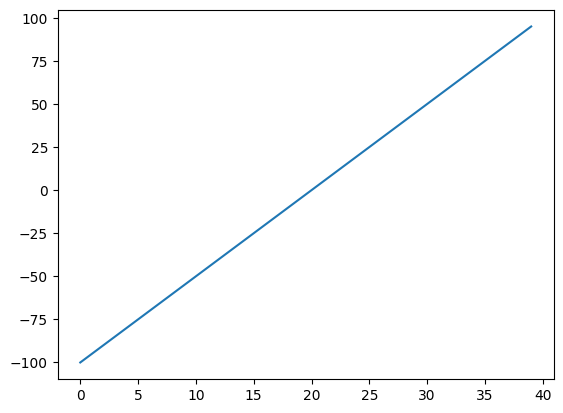

In [35]:
plt.plot(df['x'])

In [36]:
df['x2'] = df['x']**2
df['x3'] = df['x']**3
df['x4'] = df['x']**4

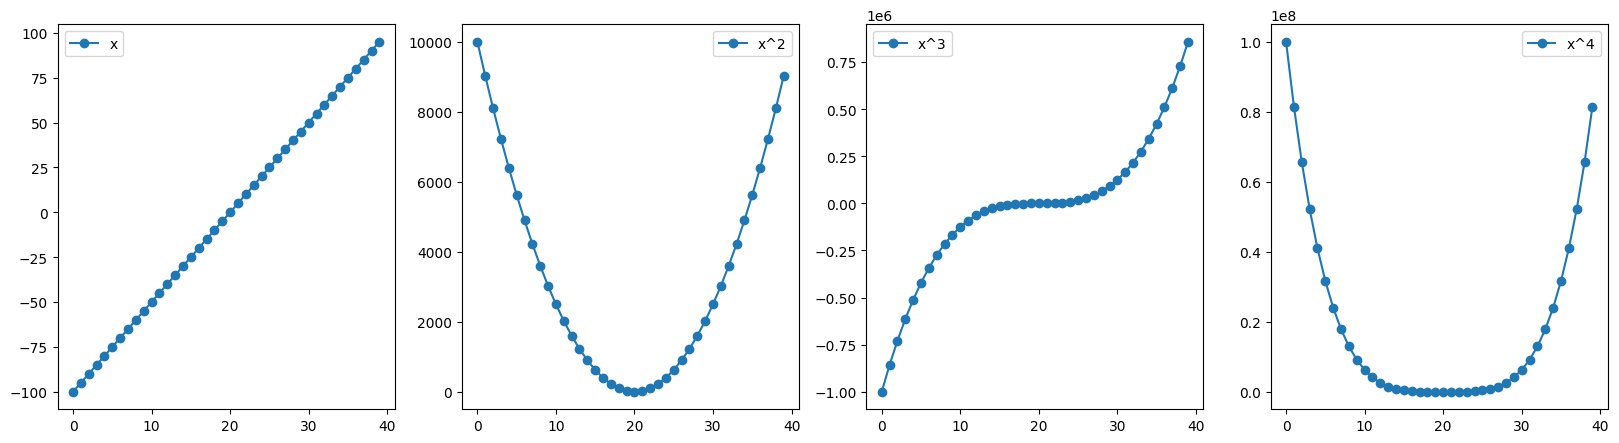

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (20, 5))
ax1.plot(df['x'], label= 'x', marker = 'o')
ax2.plot(df['x2'], label= 'x^2', marker = 'o')
ax3.plot(df['x3'], label= 'x^3', marker = 'o')
ax4.plot(df['x4'], label= 'x^4', marker = 'o')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<Axes: xlabel='Level', ylabel='Salary'>

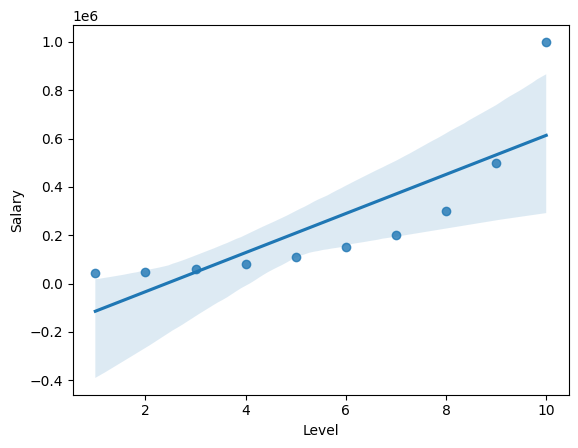

In [39]:
sns.regplot(data= df, x = 'Level', y = 'Salary', marker = 'o')

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [41]:
x = df[['Level']]
y = df[['Salary']]

In [42]:
np.set_printoptions(suppress= True)

In [43]:
pf = PolynomialFeatures(degree = 5)
xp = pf.fit_transform(x)
xp

array([[     1.,      1.,      1.,      1.,      1.,      1.],
       [     1.,      2.,      4.,      8.,     16.,     32.],
       [     1.,      3.,      9.,     27.,     81.,    243.],
       [     1.,      4.,     16.,     64.,    256.,   1024.],
       [     1.,      5.,     25.,    125.,    625.,   3125.],
       [     1.,      6.,     36.,    216.,   1296.,   7776.],
       [     1.,      7.,     49.,    343.,   2401.,  16807.],
       [     1.,      8.,     64.,    512.,   4096.,  32768.],
       [     1.,      9.,     81.,    729.,   6561.,  59049.],
       [     1.,     10.,    100.,   1000.,  10000., 100000.]])

In [44]:
reg = LinearRegression()
reg.fit(xp, y)

LinearRegression()

In [45]:
ypred = reg.predict(xp)
r2_score(y, ypred)

0.9997969027099755

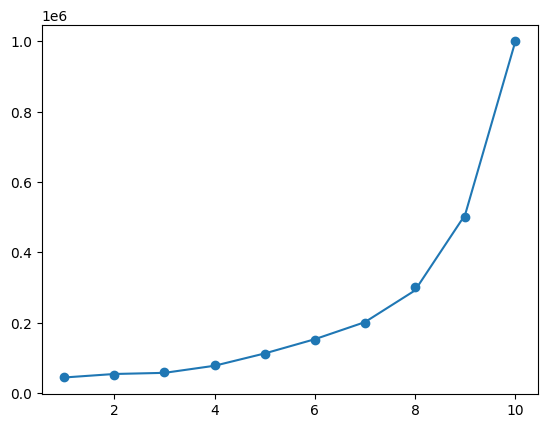

In [47]:
plt.scatter(x, y)
plt.plot(x, ypred)
plt.show()

In [53]:
reg.predict(pf.transform([[11],[12],[13]])).astype(int)

c:\Users\raxriot\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[2006333],
       [3876484],
       [7080272]])

In [54]:
df = pd.read_csv('../datasets/data2.csv')
df

,x,y,z
0,61.130810,306.430594,a
1,14.366986,280.191604,a
2,8.009490,220.599780,a
3,26.436976,252.157994,a
4,11.188559,230.575761,a
...,...,...,...
395,686.472229,287.833280,a
396,722.513850,295.425671,a
397,681.200832,265.934006,a
398,717.262177,376.912665,a


In [55]:
from sklearn.model_selection import train_test_split

Metrics
MSE: 3467.3384952005486
MAE: 50.37641662121694
r2: -0.01659722011493625


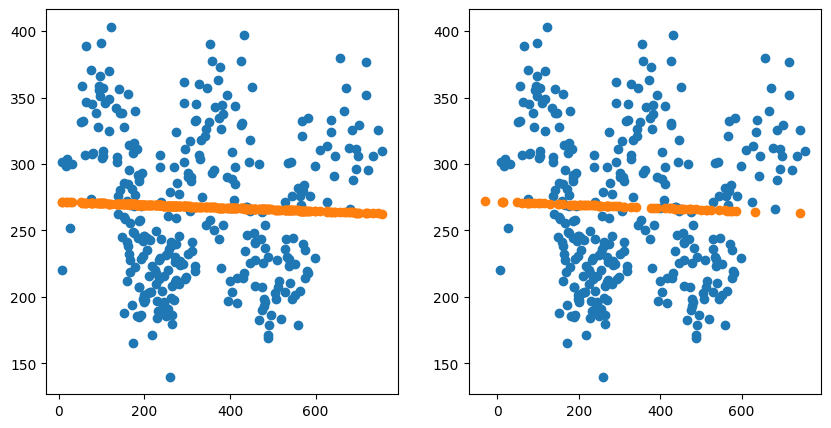

Metrics
MSE: 3180.0332409920334
MAE: 46.83549851564451
r2: 0.06763849069238093


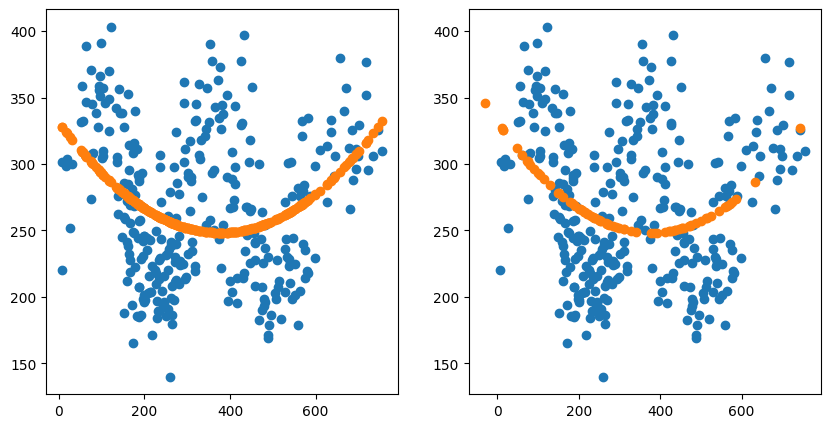

Metrics
MSE: 3188.3182816318676
MAE: 47.02296421280734
r2: 0.0652093799220731


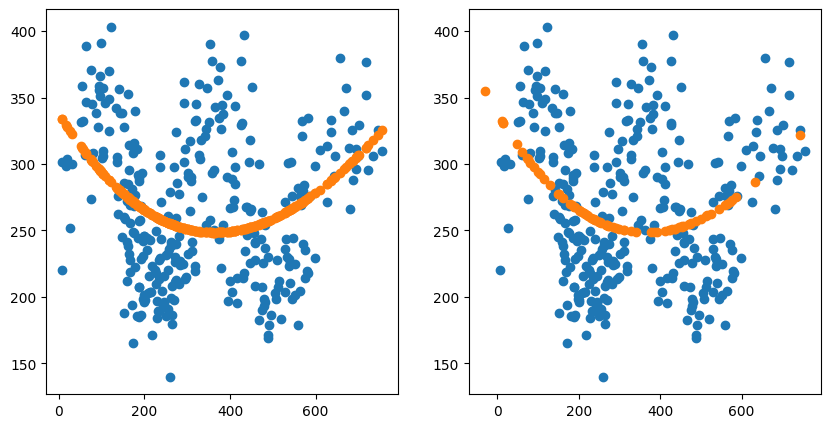

Metrics
MSE: 3406.0705945499417
MAE: 48.841600023635934
r2: 0.0013660613961995471


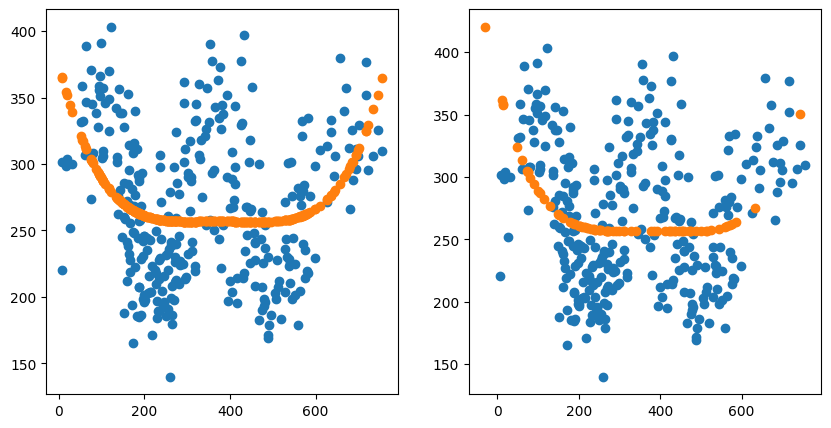

Metrics
MSE: 3128.13911248465
MAE: 46.700084648699445
r2: 0.08285345365429442


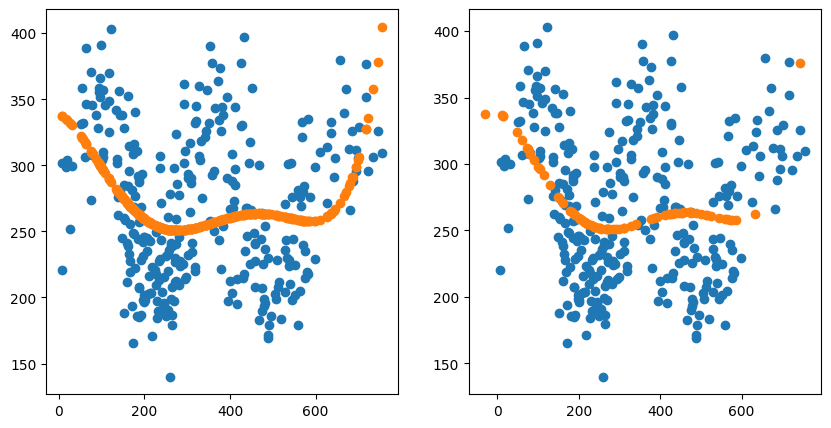

Metrics
MSE: 3126.946947293876
MAE: 45.908000213143694
r2: 0.08320298740201948


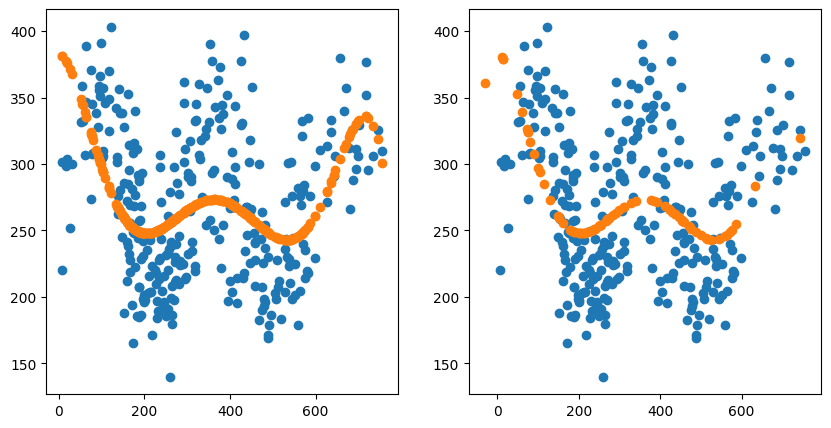

Metrics
MSE: 2684.2773495395886
MAE: 42.4854819443648
r2: 0.21299033961159286


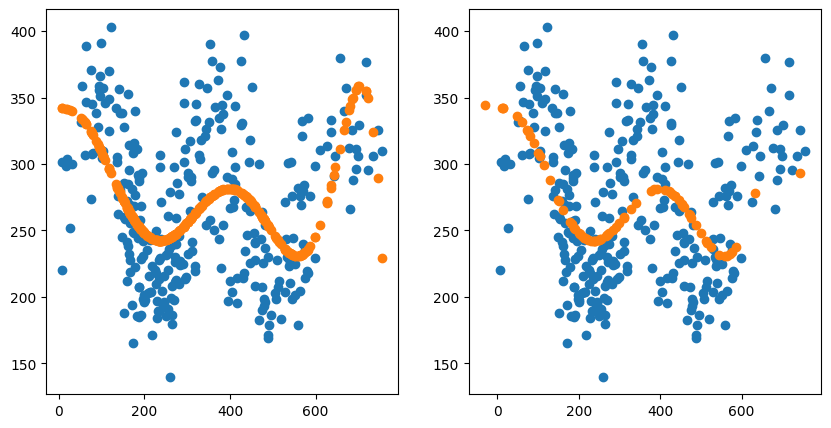

Metrics
MSE: 2836.227029908153
MAE: 44.008420767122075
r2: 0.16843985142768647


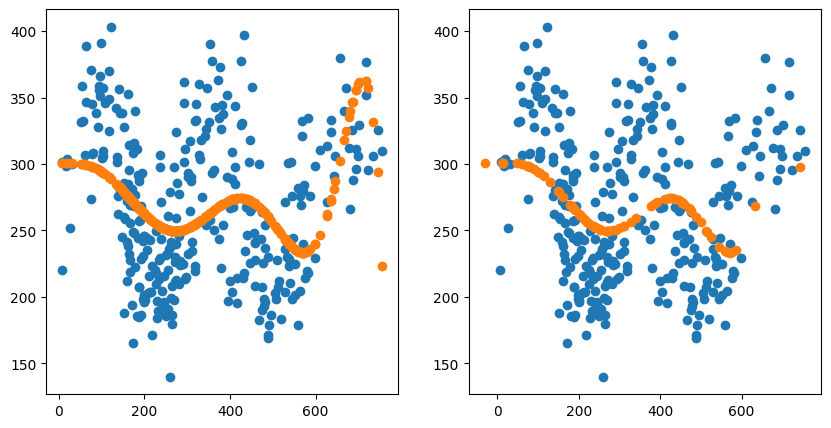

Metrics
MSE: 3210.313246835034
MAE: 47.67140894386309
r2: 0.0587606237613999


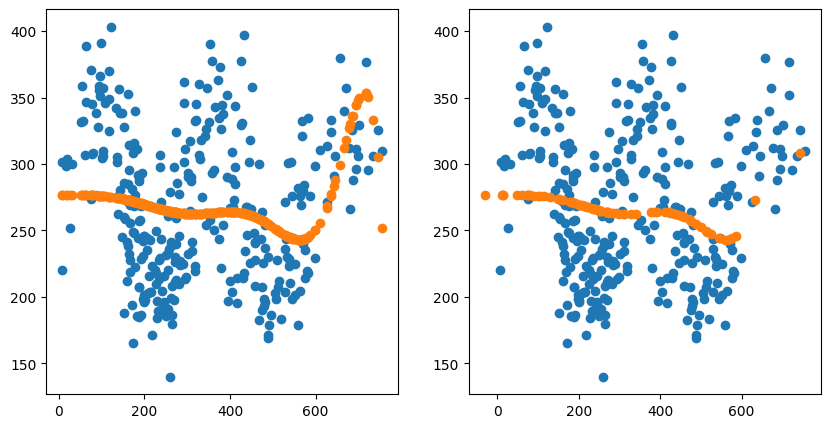

In [73]:
x = df[['x']]
y = df[['y']]
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
for degree in range(1, 10):
    #degree = 6
    model = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', LinearRegression())
    ])
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    print('Metrics')
    print(f'MSE: {mean_squared_error(ytest, ypred)}')
    print(f'MAE: {mean_absolute_error(ytest, ypred)}')
    print(f'r2: {r2_score(ytest, ypred)}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(Xtrain, ytrain)
    ax1.scatter(Xtrain, model.predict(Xtrain))
    ax2.scatter(Xtrain, ytrain)
    ax2.scatter(Xtest, ypred)
    plt.show()

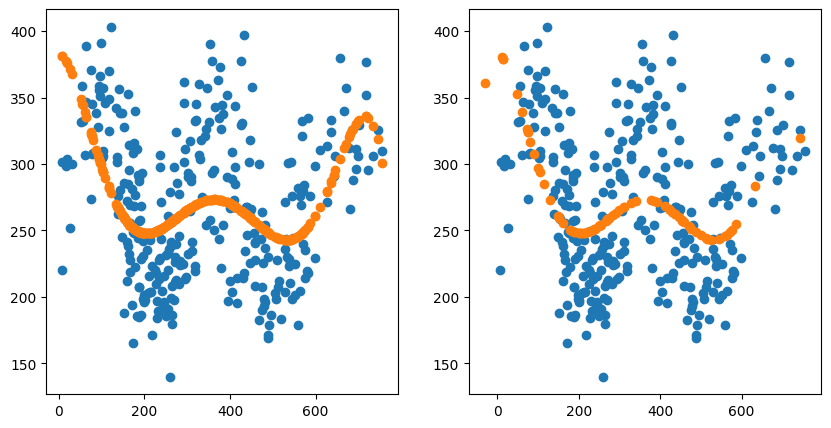